# 1.Installing Python packages

In [2]:
%pip install numpy==1.23.4 pandas==1.5.1 scikit-learn==1.1.3 scipy==1.9.3 mdtraj==1.9.9


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /home/houfang/Desktop/APP/MD2NMR-APP_20250719/example/test_env/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 2.Configuring the config.py file

In [4]:
# n_split = 90 
# tau_max = 6
# B0 = 14.1 
# resid = [[0, 37]]#[[0, 135], [0, 135]]
# use_chain_ids = True #True or False
# chain_ids = ['H']
# wd = './data/'  
# od = './data/'
# dt = 40
# n_exp = 3


# traj_segment = [5000, 50000]  #[start_snap:end_snap] or None
# traj_stride = 1


# use_align = False
# tumbling_time = None 

# prefix_list = ['vanilla_run1']#for batch mode.

# 3.Running the MD2NMR program

In [6]:
!python3 ./src/md2nmr.py -t WT_rw_run1.pdb -y WT_rw_run1_2000ns_40ps.xtc 

###############    Software starting now.    ###############
Input argument and config files currently using:
Namespace(topo='WT_rw_run1.pdb', traj='WT_rw_run1_2000ns_40ps.xtc', batch=False)
n_split: 90
tau_max: 6
B0: 14.1
resid: [[0, 37]]
use_chain_ids: True
chain_ids: ['H']
wd: ./data/
od: ./data/
dt: 40
n_exp: 3
traj_segment: [5000, 50000]
traj_stride: 1
use_align: False
tumbling_time: None
prefix_list: ['vanilla_run1']
###############    Calculation starting...    ###############
Calculation using single traj style.
Loading trajectory frames from 5000 to 50000 with stride=1...
/home/houfang/miniconda3/lib/python3.10/site-packages/mdtraj/formats/pdb/pdbfile.py:208: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(
Trajectory loaded. Total frames after slicing: 45000
Total frames of MD trajectory loaded:  45000
vec shape after split: (90, 500, 35, 3)
###############    Calculation c

In [20]:
# use_chain_ids = False #True or False

!python ./src/md2nmr.py -t H3.pdb -y H3_1.xtc

###############    Software starting now.    ###############
Input argument and config files currently using:
Namespace(topo='H3.pdb', traj='H3_1.xtc', batch=False)
n_split: 90
tau_max: 6
B0: 14.1
resid: [[0, 37]]
use_chain_ids: False
chain_ids: ['H']
wd: ./data/
od: ./data/
dt: 40
n_exp: 3
traj_segment: [5000, 50000]
traj_stride: 1
use_align: False
tumbling_time: None
prefix_list: ['vanilla_run1']
###############    Calculation starting...    ###############
Calculation using single traj style.
Loading trajectory frames from 5000 to 50000 with stride=1...
/home/houfang/miniconda3/lib/python3.10/site-packages/mdtraj/formats/pdb/pdbfile.py:208: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(
Trajectory loaded. Total frames after slicing: 45000
Total frames of MD trajectory loaded:  45000
vec shape after split: (90, 500, 35, 3)
###############    Calculation completed. Software exitin

# 4.Visualizing NMR data

## 4.1 Showing the chi-squared (χ²) and R² values to quantify the differences between the fitted autocorrelation curves and the raw c(t) data

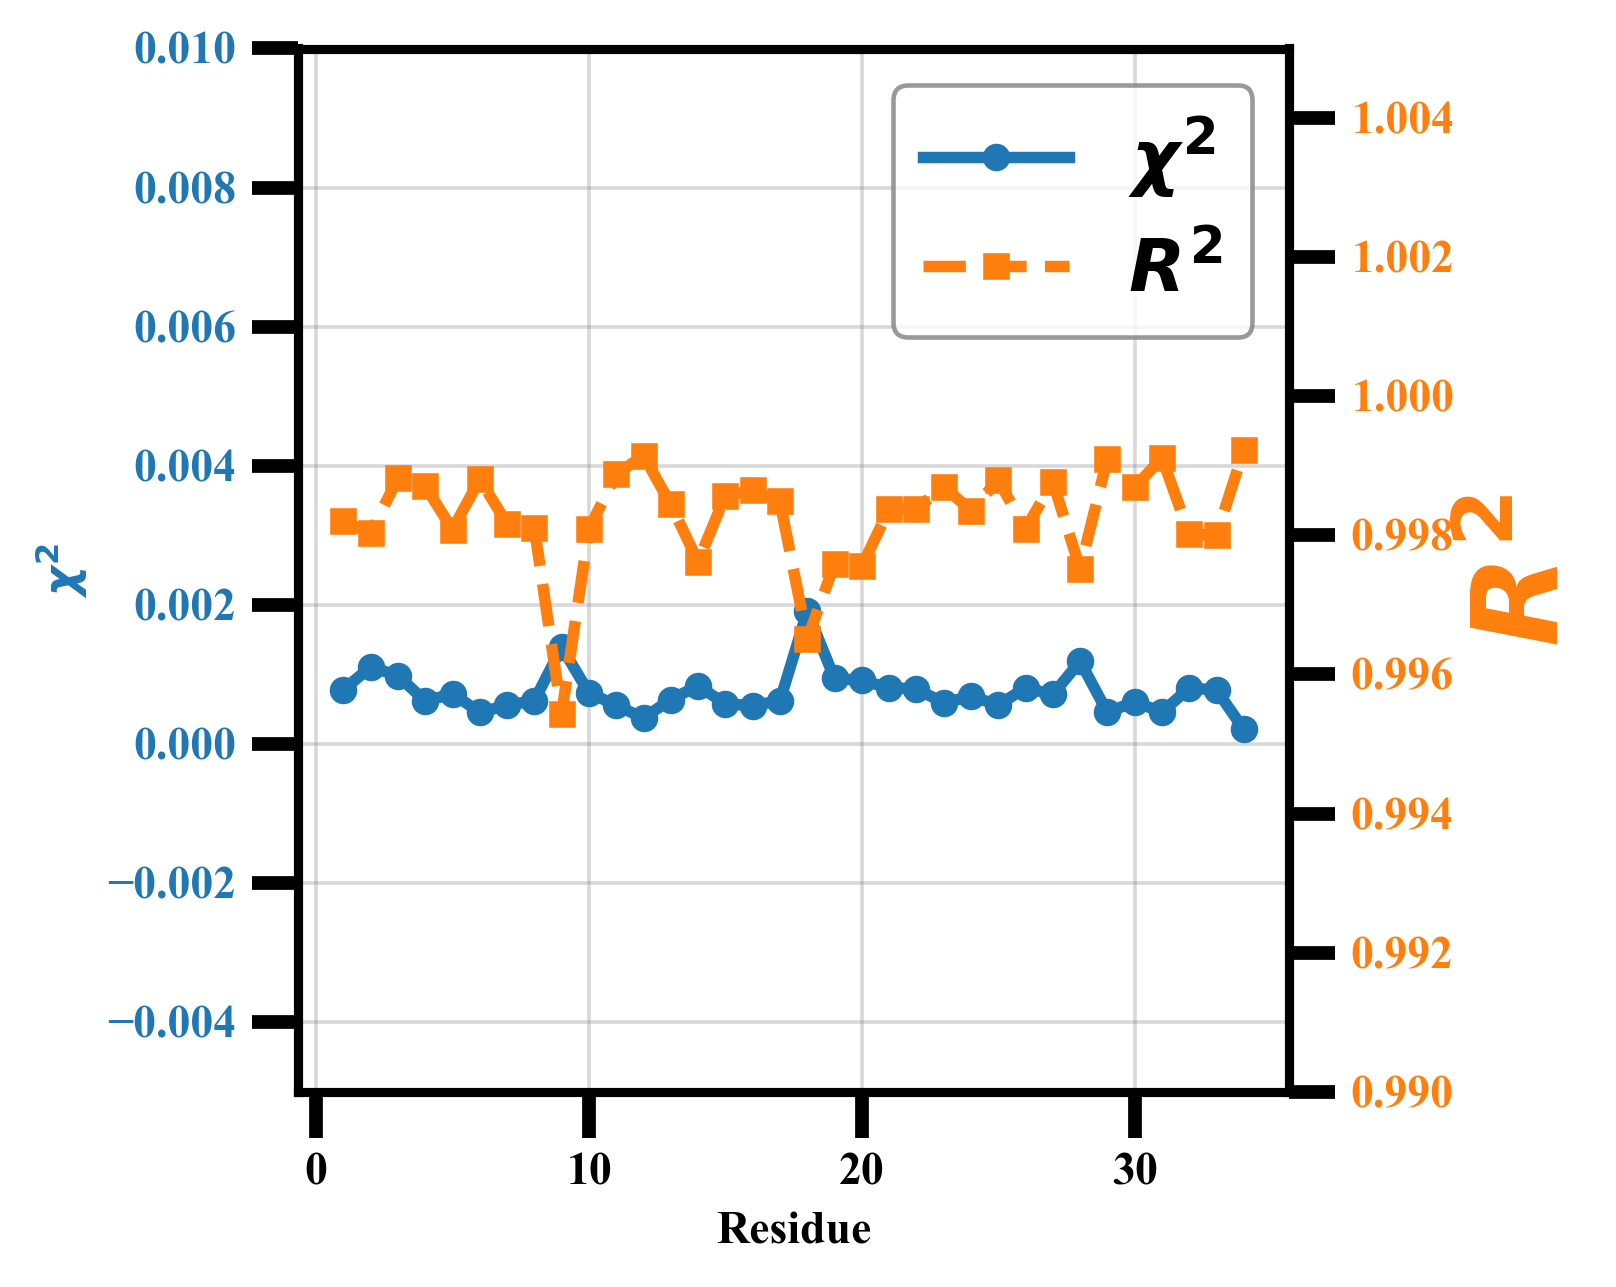

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 330
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.labelweight"] = "bold"
df_data = pd.read_csv("./data/WT_rw_run1_2000ns_40ps_Relaxtion.csv")
df_residue = pd.read_csv("./data/WT_rw_run1_2000ns_40ps_NH_Res.csv")
x = df_residue.iloc[1:, 0] 
y1 = df_data["Chi_Fit"].iloc[1:]
y2 = df_data["R2_Fit"].iloc[1:]
fig, ax1 = plt.subplots(figsize=(5, 4))

ax1.plot(x, y1, 'o-', color="#1f77b4", linewidth=2.5, markersize=5, label='Chi_Fit')
ax1.set_xlabel('Residue', fontsize=10, fontweight='bold')
ax1.set_ylabel(r'$\chi^2$', fontsize=10, fontweight='bold', color="#1f77b4")
ax1.tick_params(axis='y', labelcolor="#1f77b4", width=3, length=10, labelsize=10)
ax1.tick_params(axis='x', width=3, length=10, labelsize=10)
#ax1.set_xlim(1, 35) 
ax1.set_ylim(-0.005, 0.01)
for spine in ax1.spines.values():
    spine.set_linewidth(2)
ax2 = ax1.twinx()
ax2.plot(x, y2, 's--', color="#ff7f0e", linewidth=2.5, markersize=5, label='R2_Fit')
ax2.set_ylabel(r'$R^2$', fontsize=26, fontweight='bold', color="#ff7f0e")
ax2.tick_params(axis='y', labelcolor="#ff7f0e", width=3, length=10, labelsize=10)
ax2.set_ylim(0.99, 1.005)


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
labels_1 = [r'$\chi^2$']
labels_2 = [r'$R^2$']
ax1.legend(lines_1 + lines_2, labels_1 + labels_2,
     loc='best', fontsize=16, frameon=True,
     facecolor='white', edgecolor='gray')


ax1.grid(color="grey", alpha=0.3)
plt.tight_layout()
plt.savefig("Chi_R2_dual_axis_plot.png")

## 4.2 Plotting NMR relaxation parameters

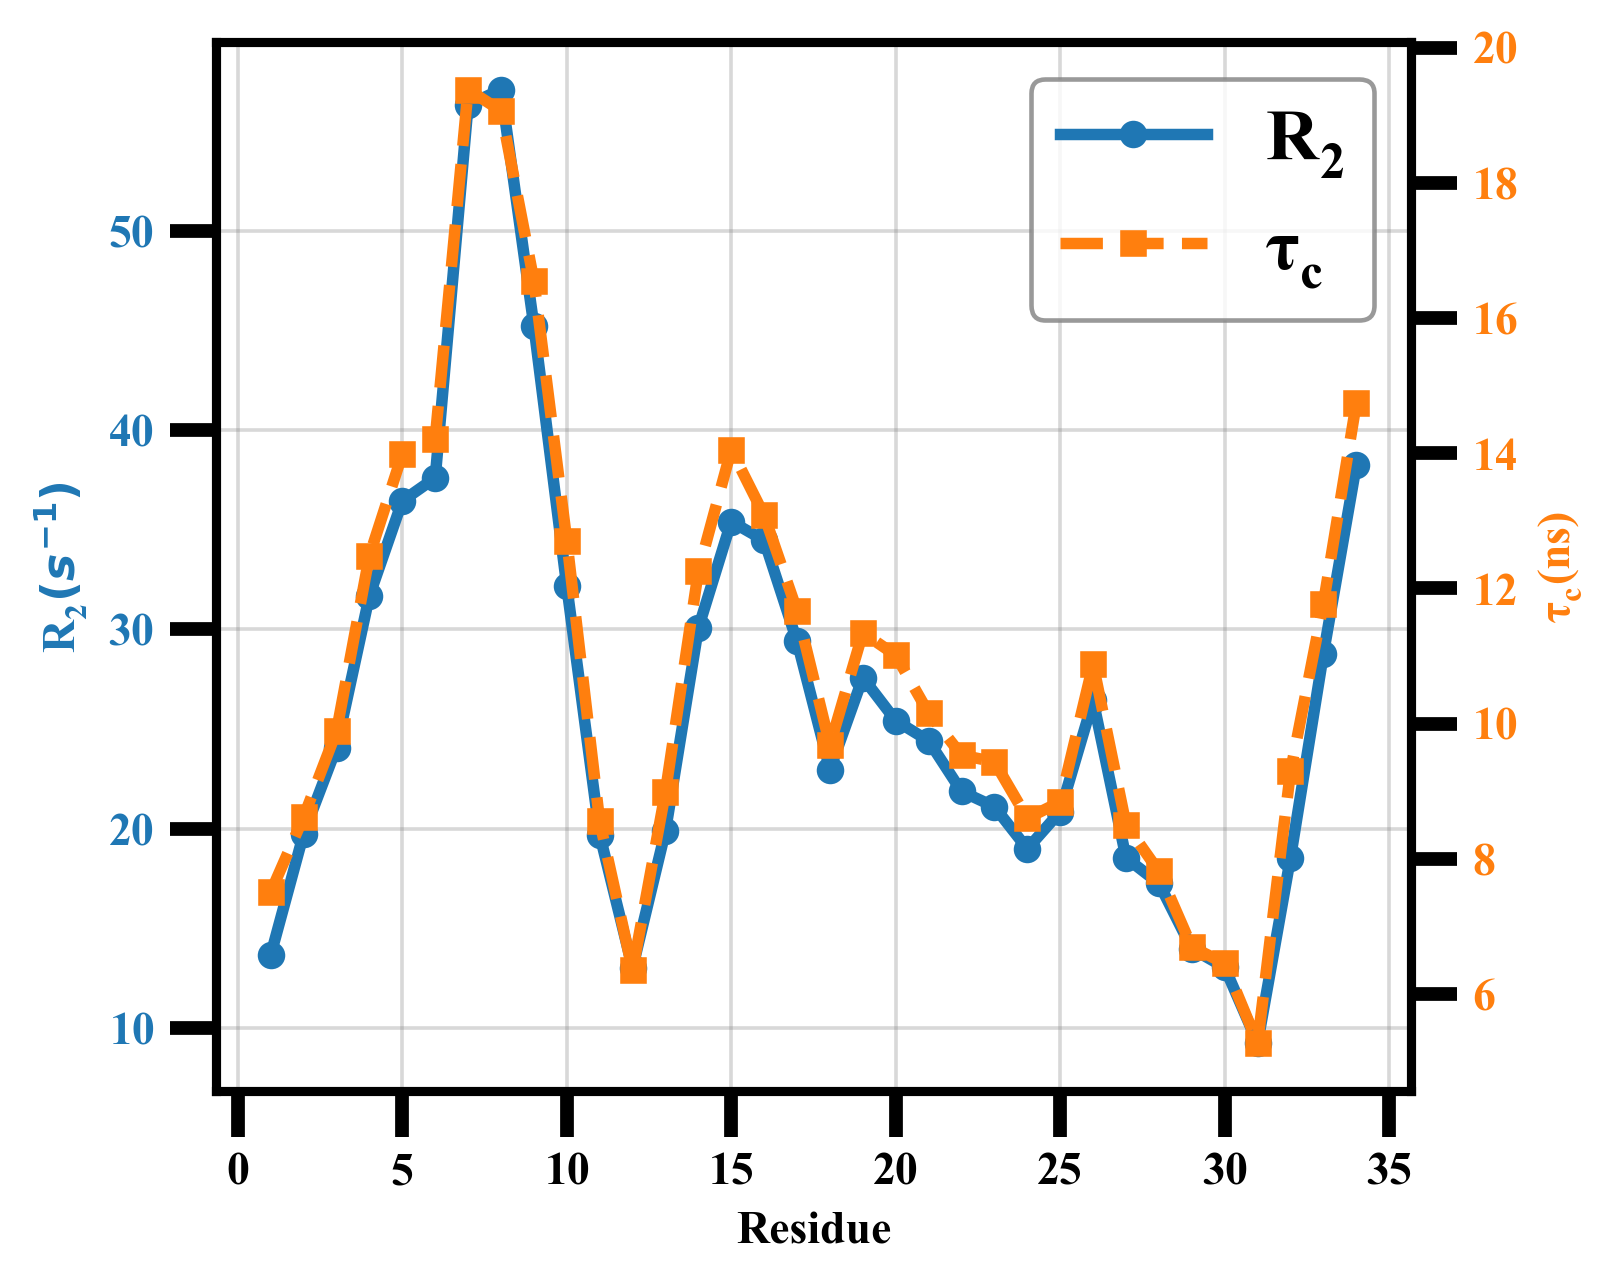

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 330
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.labelweight"] = "bold"
df_data = pd.read_csv("./data/WT_rw_run1_2000ns_40ps_Relaxtion.csv")
df_residue = pd.read_csv("./data/WT_rw_run1_2000ns_40ps_NH_Res.csv")
x = df_residue.iloc[1:, 0] 
y1 = df_data["R2"].iloc[1:]
y2 = df_data["tau_c"].iloc[1:]
fig, ax1 = plt.subplots(figsize=(5, 4))

ax1.plot(x, y1, 'o-', color="#1f77b4", linewidth=2.5, markersize=5, label='Chi_Fit')
ax1.set_xlabel('Residue', fontsize=10, fontweight='bold')
ax1.set_ylabel(r'$\mathregular{R_2}(s^{-1})$', fontsize=10, fontweight='bold', color="#1f77b4")
ax1.tick_params(axis='y', labelcolor="#1f77b4", width=3, length=10, labelsize=10)
ax1.tick_params(axis='x', width=3, length=10, labelsize=10)
#ax1.set_xlim(0, 10) 
#ax1.set_ylim(-0.005, 0.2)
for spine in ax1.spines.values():
    spine.set_linewidth(2)
ax2 = ax1.twinx()
ax2.plot(x, y2, 's--', color="#ff7f0e", linewidth=2.5, markersize=5, label='R2_Fit')
ax2.set_ylabel(r'$\mathregular{τ_c}$(ns)', fontsize=10, fontweight='bold', color="#ff7f0e")
ax2.tick_params(axis='y', labelcolor="#ff7f0e", width=3, length=10, labelsize=10)
#ax2.set_ylim(0.80, 1.005)


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
labels_1 = [r'$\mathregular{R_2}$']
labels_2 = [r'$\mathregular{τ_c}$']
ax1.legend(lines_1 + lines_2, labels_1 + labels_2,
     loc='best', fontsize=16, frameon=True,
     facecolor='white', edgecolor='gray')


ax1.grid(color="grey", alpha=0.3)
plt.tight_layout()
plt.savefig("NMR-data-Tau_c-and-R2.png")